<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2023<br>
            Dr. Eric Van Dusen <br>
        Shashank Dalmia, Ergun Acikoz</p></td></tr>
</table>

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from datascience import *
%matplotlib inline
from csaps import csaps

# Cubic Cost Functions

The cubic cost function is one that is commonly used to model a cost function within a firm.  

This notebook uses parameters from a recent article  with some parameters for the cubic cost function, in a journal on Teaching Applied Economics

>"Tractable Cubic Cost Functions for Teaching Microeconomics"
>June 21,2023; Applied Economics Teaching Resources (AETR);
>Scott M. Swinton and Hanzhe Zhang

https://www.aaea.org/UserFiles/file/AETR_2021_003RProofFinal.pdf

- d=3600
- c=177
- b=-15
- a=0.5

Let's use these as starting values but then use widgets to allow us to play with the parameters!

In [2]:
# Define the variables and parameters
q = sp.symbols('q')  # Quantity of goods produced

# Define the cubic cost function
a = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='a')
b = widgets.FloatSlider(value=-15, min=-30, max=30, step=1, description='b')
c = widgets.FloatSlider(value=177.0, min=0, max=250, step=5, description='c')
d = widgets.FloatSlider(value=3600, min=0, max=10000, step=100, description='d')

def plot_cubic_cost_function(a, b, c, d):
    cost_function = a * q**3 + b * q**2 + c * q + d

    cost_function_np = sp.lambdify(q, cost_function, 'numpy')

    quantity_values = np.linspace(0, 25, 100)
    cost_values = cost_function_np(quantity_values)

    plt.figure(figsize=(8, 6))
    plt.plot(quantity_values, cost_values, label='Cost Function', color='blue')
    plt.xlabel('Quantity Produced')
    plt.ylabel('Cost')
    plt.title('Cubic Cost Function')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_cubic_cost_function, a=a, b=b, c=c, d=d)

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.01), FloatSlider(value=-15.0, de…

<function __main__.plot_cubic_cost_function(a, b, c, d)>

In [3]:
# Define the variables and parameters
q = sp.symbols('q')  # Quantity of goods produced

# Define the cubic cost function
d=2000
c=177
b=-15
a=0.5
cost_function = a * q**3 + b * q**2 + c * q + d

# Convert the SymPy expression to a numpy function
cost_function_np = sp.lambdify(q, cost_function, 'numpy')

# Generate a range of quantity values
quantity_values = np.linspace(0, 30, 16)  # Levels of Q from 0 to 20

# Calculate total costs (TC) for each quantity level (fixed costs are set to D)
total_costs = cost_function_np(quantity_values)

# Create a data table with datascience
cost_table = Table().with_columns(
    'Quantity-Q', quantity_values,
    'Fixed Costs-FC', d,
    'Total Costs-TC', total_costs
)

# Display the data table
cost_table


Quantity-Q,Fixed Costs-FC,Total Costs-TC
0,2000,2000
2,2000,2298
4,2000,2500
6,2000,2630
8,2000,2712
10,2000,2770
12,2000,2828
14,2000,2910
16,2000,3040
18,2000,3242


In [4]:
total_variable_cost = cost_table.column("Total Costs-TC") - cost_table.column('Fixed Costs-FC')
total_variable_cost

array([   0.,  298.,  500.,  630.,  712.,  770.,  828.,  910., 1040.,
       1242., 1540., 1958., 2520., 3250., 4172., 5310.])

In [5]:
cost_table = cost_table.with_column("Total Variable Cost-TVC", total_variable_cost)
cost_table

Quantity-Q,Fixed Costs-FC,Total Costs-TC,Total Variable Cost-TVC
0,2000,2000,0
2,2000,2298,298
4,2000,2500,500
6,2000,2630,630
8,2000,2712,712
10,2000,2770,770
12,2000,2828,828
14,2000,2910,910
16,2000,3040,1040
18,2000,3242,1242


In [6]:
average_total_cost = cost_table.column("Total Costs-TC") / cost_table.column("Quantity-Q")
average_total_cost[0] = 0
average_total_cost


/tmp/ipykernel_2568/2436972155.py:1: RuntimeWarning: divide by zero encountered in true_divide
  average_total_cost = cost_table.column("Total Costs-TC") / cost_table.column("Quantity-Q")


array([   0.        , 1149.        ,  625.        ,  438.33333333,
        339.        ,  277.        ,  235.66666667,  207.85714286,
        190.        ,  180.11111111,  177.        ,  179.90909091,
        188.33333333,  201.92307692,  220.42857143,  243.66666667])

In [7]:
cost_table = cost_table.with_column("Average Total Cost-ATC", average_total_cost)
cost_table

Quantity-Q,Fixed Costs-FC,Total Costs-TC,Total Variable Cost-TVC,Average Total Cost-ATC
0,2000,2000,0,0
2,2000,2298,298,1149
4,2000,2500,500,625
6,2000,2630,630,438.333
8,2000,2712,712,339
10,2000,2770,770,277
12,2000,2828,828,235.667
14,2000,2910,910,207.857
16,2000,3040,1040,190
18,2000,3242,1242,180.111


In [8]:
average_variable_cost = cost_table.column("Total Variable Cost-TVC") / cost_table.column("Quantity-Q")
average_variable_cost[0] = 0

cost_table = cost_table.with_column("Average Variable Cost-AVC", average_variable_cost)
cost_table

/tmp/ipykernel_2568/1645090127.py:1: RuntimeWarning: invalid value encountered in true_divide
  average_variable_cost = cost_table.column("Total Variable Cost-TVC") / cost_table.column("Quantity-Q")


Quantity-Q,Fixed Costs-FC,Total Costs-TC,Total Variable Cost-TVC,Average Total Cost-ATC,Average Variable Cost-AVC
0,2000,2000,0,0,0
2,2000,2298,298,1149,149
4,2000,2500,500,625,125
6,2000,2630,630,438.333,105
8,2000,2712,712,339,89
10,2000,2770,770,277,77
12,2000,2828,828,235.667,69
14,2000,2910,910,207.857,65
16,2000,3040,1040,190,65
18,2000,3242,1242,180.111,69


In [9]:
average_fixed_cost = cost_table.column("Fixed Costs-FC") / cost_table.column("Quantity-Q")
average_fixed_cost[0] = 0

cost_table = cost_table.with_column("Average Fixed Cost-AFC", average_fixed_cost)
cost_table

/tmp/ipykernel_2568/4117541817.py:1: RuntimeWarning: divide by zero encountered in true_divide
  average_fixed_cost = cost_table.column("Fixed Costs-FC") / cost_table.column("Quantity-Q")


Quantity-Q,Fixed Costs-FC,Total Costs-TC,Total Variable Cost-TVC,Average Total Cost-ATC,Average Variable Cost-AVC,Average Fixed Cost-AFC
0,2000,2000,0,0,0,0
2,2000,2298,298,1149,149,1000
4,2000,2500,500,625,125,500
6,2000,2630,630,438.333,105,333.333
8,2000,2712,712,339,89,250
10,2000,2770,770,277,77,200
12,2000,2828,828,235.667,69,166.667
14,2000,2910,910,207.857,65,142.857
16,2000,3040,1040,190,65,125
18,2000,3242,1242,180.111,69,111.111


This array Q1 is the number of people willing to pay at each price from highest to lowest

### Step 2: Sum the number of people willing to pay that price or higher


In [10]:
marginal_cost = np.diff(total_costs)
marginal_cost = np.append(make_array(0), marginal_cost)
marginal_cost

array([   0.,  298.,  202.,  130.,   82.,   58.,   58.,   82.,  130.,
        202.,  298.,  418.,  562.,  730.,  922., 1138.])

In [11]:
cost_table = cost_table.with_column("Marginal Cost", marginal_cost)
cost_table

Quantity-Q,Fixed Costs-FC,Total Costs-TC,Total Variable Cost-TVC,Average Total Cost-ATC,Average Variable Cost-AVC,Average Fixed Cost-AFC,Marginal Cost
0,2000,2000,0,0,0,0,0
2,2000,2298,298,1149,149,1000,298
4,2000,2500,500,625,125,500,202
6,2000,2630,630,438.333,105,333.333,130
8,2000,2712,712,339,89,250,82
10,2000,2770,770,277,77,200,58
12,2000,2828,828,235.667,69,166.667,58
14,2000,2910,910,207.857,65,142.857,82
16,2000,3040,1040,190,65,125,130
18,2000,3242,1242,180.111,69,111.111,202


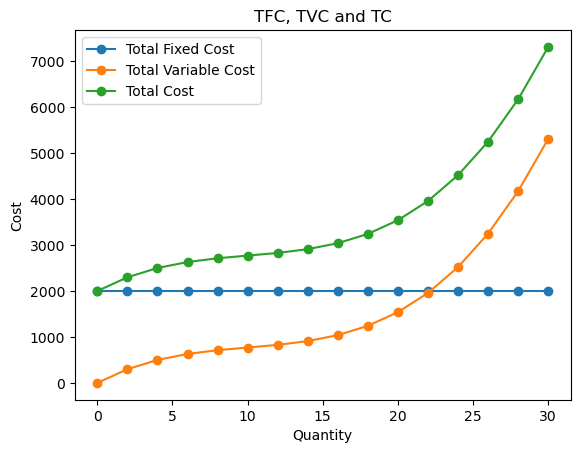

In [12]:
plt.plot(cost_table.column("Quantity-Q"), cost_table.column("Fixed Costs-FC"), marker='o')
plt.plot(cost_table.column("Quantity-Q"), cost_table.column("Total Variable Cost-TVC"), marker='o')
plt.plot(cost_table.column("Quantity-Q"), cost_table.column("Total Costs-TC"), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('TFC, TVC and TC')
plt.legend(make_array("Total Fixed Cost","Total Variable Cost","Total Cost"))

plt.show()

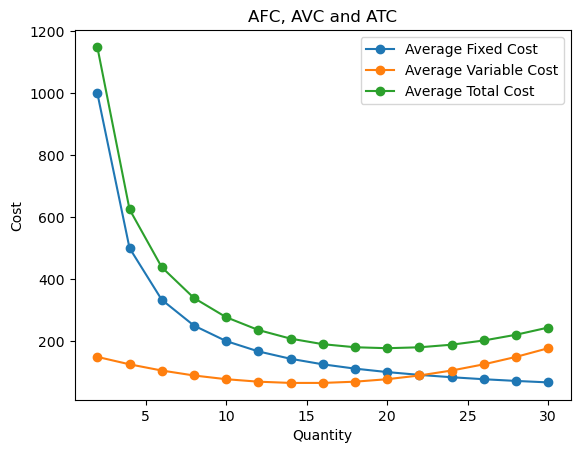

In [13]:
plt.plot(cost_table.column("Quantity-Q")[1:], cost_table.column("Average Fixed Cost-AFC")[1:], marker='o')
plt.plot(cost_table.column("Quantity-Q")[1:], cost_table.column("Average Variable Cost-AVC")[1:], marker='o')
plt.plot(cost_table.column("Quantity-Q")[1:], cost_table.column("Average Total Cost-ATC")[1:], marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('AFC, AVC and ATC')
plt.legend(make_array("Average Fixed Cost","Average Variable Cost","Average Total Cost"))

plt.show()

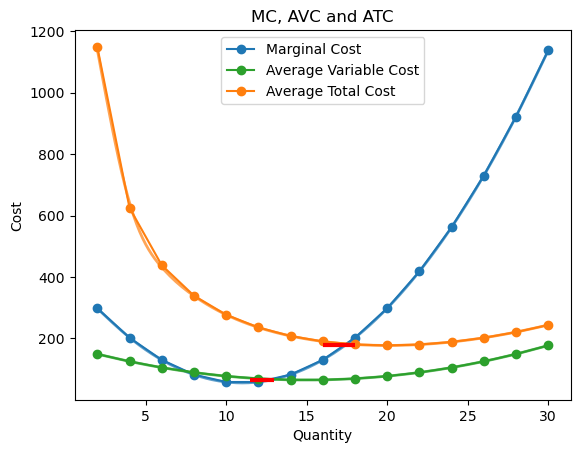

In [14]:
# You do not need to understand what the code below is doing. 
output = cost_table.column("Quantity-Q")[1:]
mc = cost_table.column("Marginal Cost")[1:]
avc = cost_table.column("Average Variable Cost-AVC")[1:]
atc = cost_table.column("Average Total Cost-ATC")[1:]

sp_mc = csaps(output, mc, smooth=0.85)
sp_avc = csaps(output, avc, smooth=0.85)
sp_atc = csaps(output, atc, smooth=0.85)

output_s = np.linspace(output.min(), output.max(), 150)
mc_s = sp_mc(output_s)
avc_s = sp_avc(output_s)
atc_s = sp_atc(output_s)

plt.plot(output, mc, marker = 'o', color = 'tab:blue')
plt.plot(output_s, mc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output, avc, marker = 'o', color = 'tab:green')
plt.plot(output_s, avc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output, atc, marker = 'o', color = 'tab:orange')
plt.plot(output_s, atc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc), xmin = 11.5, xmax = 13, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc), xmin = 16, xmax = 18, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()